In [38]:
import sentiment_analysis as sa
import importlib
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
importlib.reload(sa)


<module 'sentiment_analysis' from '/home/alessia/Documenti/Progetti/mbti_sentiment/sentiment_analysis.py'>

__Trait analysis__

__I/E__

In [ ]:
extroverts = sa.get_trait_types("e")
extroverts_avg = sa.get_types_avg_emotion(extroverts)


In [ ]:
introverts = sa.get_trait_types("i")
introverts_avg = sa.get_types_avg_emotion(introverts)


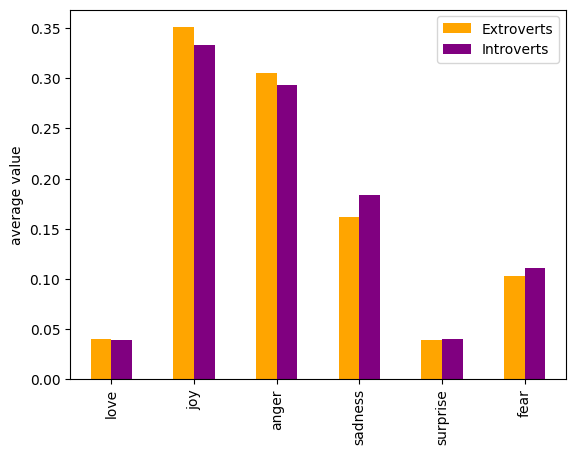

In [5]:
extroverts_introverts = pd.DataFrame(index=extroverts_avg.keys())
extroverts_introverts["Extroverts"] = extroverts_avg.values()
extroverts_introverts["Introverts"] = introverts_avg.values()

extroverts_introverts.plot.bar(color=["orange", "purple"])
plt.ylabel("average value")
plt.show()


__N/S__

In [ ]:
intuitives = sa.get_trait_types("n")
intuitives_avg = sa.get_types_avg_emotion(intuitives)
sensors = sa.get_trait_types("s")
sensors_avg = sa.get_types_avg_emotion(sensors)


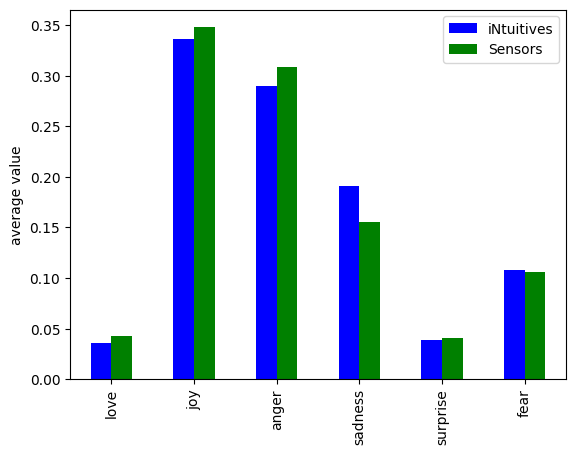

In [8]:
intuitives_sensors = pd.DataFrame(index=extroverts_avg.keys())
intuitives_sensors["iNtuitives"] = intuitives_avg.values()
intuitives_sensors["Sensors"] = sensors_avg.values()

intuitives_sensors.plot.bar(color=["blue", "green"])
plt.ylabel("average value")
plt.show()


__F/T__

In [9]:
feelers = sa.get_trait_types("f")
feelers_avg = sa.get_types_avg_emotion(feelers)
thinkers = sa.get_trait_types("t")
thinkers_avg = sa.get_types_avg_emotion(thinkers)


100%|██████████| 5469/5469 [00:00<00:00, 387634.32it/s]


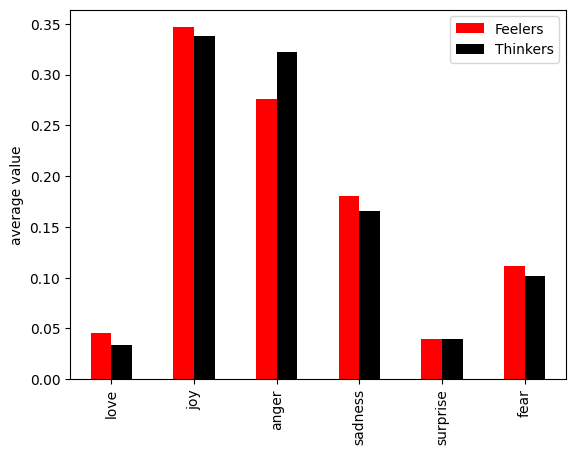

In [79]:
feelers_thinkers = pd.DataFrame(index=extroverts_avg.keys())
feelers_thinkers["Feelers"] = feelers_avg.values()
feelers_thinkers["Thinkers"] = thinkers_avg.values()

feelers_thinkers.plot.bar(color=["red", "black"])
plt.ylabel("average value")
plt.show()


__P/J__

In [ ]:
perceivers = sa.get_trait_types("p")
perceivers_avg = sa.get_types_avg_emotion(perceivers)
judgers = sa.get_trait_types("j")
judgers_avg = sa.get_types_avg_emotion(judgers)


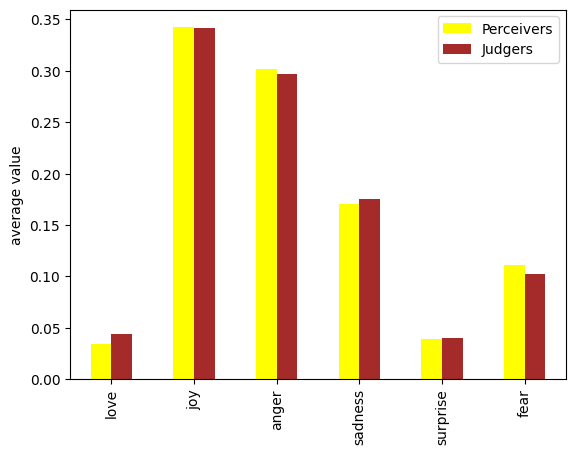

In [11]:
perceivers_judgers = pd.DataFrame(index=extroverts_avg.keys())
perceivers_judgers["Perceivers"] = perceivers_avg.values()
perceivers_judgers["Judgers"] = judgers_avg.values()

perceivers_judgers.plot.bar(color=["yellow", "brown"])
plt.ylabel("average value")
plt.show()


__Cognitive functions analysis__ 

In [ ]:
ni_doms = ["infj", "intj"]
ni_doms_avg = sa.get_types_avg_emotion(ni_doms)

ne_doms = ["entp", "enfp"]
ne_doms_avg = sa.get_types_avg_emotion(ne_doms)

fi_doms = ["infp", "isfp"]
fi_doms_avg = sa.get_types_avg_emotion(fi_doms)

ti_doms = ["intp", "istp"]
ti_doms_avg = sa.get_types_avg_emotion(ti_doms)

fe_doms = ["enfj", "esfj"]
fe_doms_avg = sa.get_types_avg_emotion(fe_doms)

te_doms = ["entj", "estj"]
te_doms_avg = sa.get_types_avg_emotion(te_doms)

si_doms = ["istj", "isfj"]
si_doms_avg = sa.get_types_avg_emotion(si_doms)

se_doms = ["estp", "esfp"]
se_doms_avg = sa.get_types_avg_emotion(se_doms)


__LOVE__

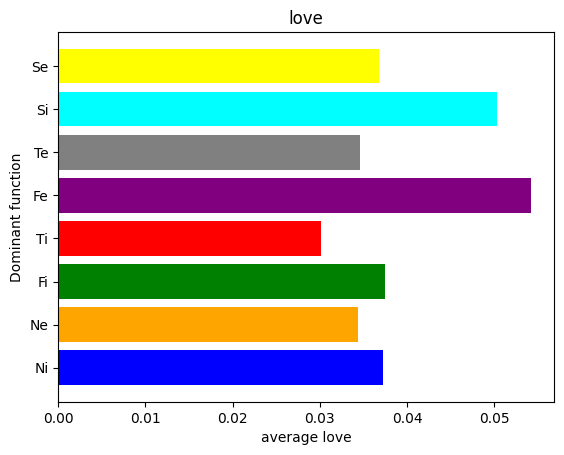

In [6]:
def get_emotion_comparison(emotion):
    doms = ["Ni", "Ne", "Fi", "Ti", "Fe", "Te", "Si", "Se"]
    values = [ni_doms_avg[emotion], ne_doms_avg[emotion], fi_doms_avg[emotion], ti_doms_avg[emotion], fe_doms_avg[emotion], te_doms_avg[emotion],
              si_doms_avg[emotion], se_doms_avg[emotion]]

    plt.barh(doms, values, color=["blue", "orange", "green", "red",
             "purple", "gray", "cyan", "yellow"])
    plt.title(emotion)
    plt.ylabel('Dominant function')
    plt.xlabel(f'average {emotion}')
    plt.show()


get_emotion_comparison("love")


__SADNESS__

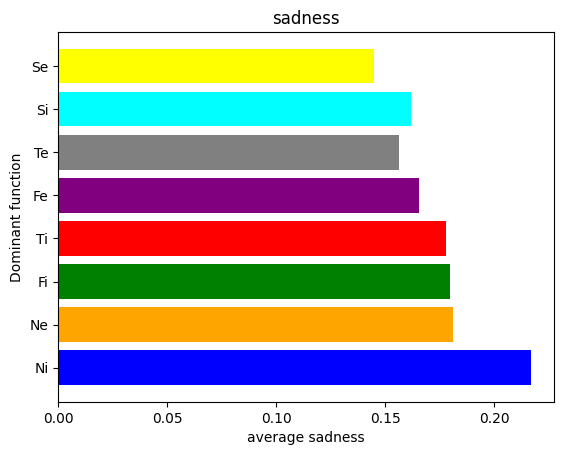

In [7]:
get_emotion_comparison("sadness")


__JOY__

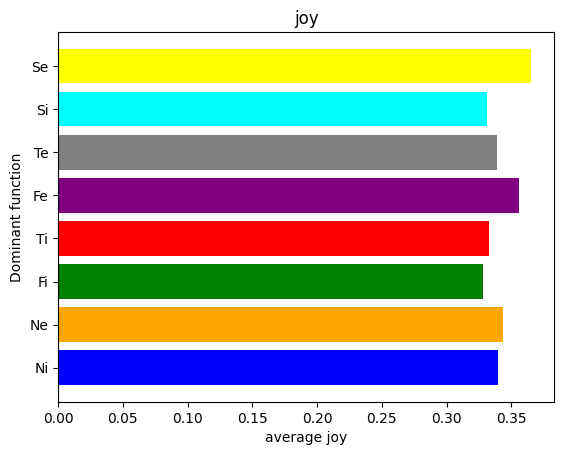

In [9]:
get_emotion_comparison("joy")


__SURPRISE__

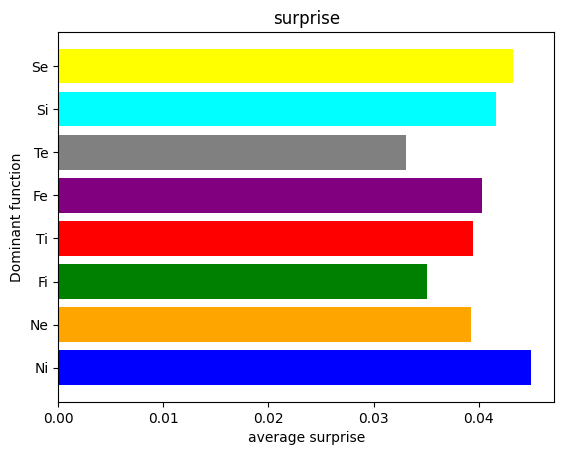

In [10]:
get_emotion_comparison("surprise")


__CLUSTERING__

In [44]:
from sklearn.cluster import KMeans


In [4]:
TYPES = ['infj',
         'intj',
         'entj',
         'infp',
         'INTP',
         'ENFP',
         'entp',
         'enfj',
         'isfj',
         'ISTJ',
         'istp',
         'isfp',
         'ESFJ',
         'ESTJ',
         'estp',
         'ESFP']


In [42]:
types_rep = dict()

for type in tqdm(TYPES):
    type_rep = list(sa.get_emotions_avg(type).values())
    sentiments, total = sa.get_sentiment_max(type)
    type_sentiment = [n/total for n in sentiments.values()]
    type_rep.extend(type_sentiment)
    types_rep[type] = type_rep

100%|██████████| 16/16 [00:04<00:00,  3.38it/s]


In [48]:
X = np.array(list(types_rep.values()))
print(X)
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
Y = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="viridis")
# pd.plotting.parallel_coordinates(Y, 'cluster')


dict_values([[0.04228819773277839, 0.33571414252406995, 0.2209507370515536, 0.24408892216264072, 0.046251953639679384, 0.11070604749990869, 0.3769792716280409, 0.6230207283719591], [0.032165332693216434, 0.3439569681613762, 0.2951197296742479, 0.18925806443728138, 0.04358893051803849, 0.09591097465825442, 0.3417217396323338, 0.6582782603676661], [0.030791525608661417, 0.3421497600422163, 0.3361926965212061, 0.16879068246133105, 0.03429052785215094, 0.08778480694762178, 0.4116573636753972, 0.5883426363246028], [0.03546843837980999, 0.30264734278771177, 0.3053869809079885, 0.19647142920157812, 0.030803334610412802, 0.12922247198424944, 0.6104994415190681, 0.38950055848093185], [0.025971714541896836, 0.33314997288892534, 0.30390122011592324, 0.18013693073012707, 0.03768925111215774, 0.11915090943852609, 0.4888826425774435, 0.5111173574225565], [0.04134627520030555, 0.3577210320041697, 0.2542923046230352, 0.19580322340286646, 0.03889403341212519, 0.11194312952052901, 0.4944260715302569, 0.

TypeError: float() argument must be a string or a real number, not 'dict_values'

## __Trait/Emotion correlation__

### __LOVE__

__I VS E__

In [14]:
corr, p_value = sa.get_correlation("i", "e", "love")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:19<00:00,  2.39s/it]


correlation:  -0.005689138195418466
p_value:  2.4903117541743698e-05


__N VS S__

In [15]:
corr, p_value = sa.get_correlation("n", "s", "love")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:15<00:00,  1.91s/it]


correlation:  -0.014911041491517507
p_value:  2.200201415596655e-28


__F VS T__

In [16]:
corr, p_value = sa.get_correlation("f", "t", "love")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:26<00:00,  3.27s/it]


correlation:  0.03552934030331856
p_value:  7.524889314288629e-153


__P VS J__

In [17]:
corr, p_value = sa.get_correlation("p", "j", "love")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:25<00:00,  3.17s/it]


correlation:  -0.019482539319585237
p_value:  2.9881278551720333e-47


### __FEAR__

__I VS E__

In [18]:
corr, p_value = sa.get_correlation("i", "e", "fear")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:19<00:00,  2.40s/it]


correlation:  0.027530498312532244
p_value:  1.5433416835592417e-92


__N VS S__

In [19]:
corr, p_value = sa.get_correlation("n", "s", "fear")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:15<00:00,  1.90s/it]


correlation:  0.010232904014179055
p_value:  3.3827212389763605e-14


__F VS T__

In [20]:
corr, p_value = sa.get_correlation("f", "t", "fear")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:25<00:00,  3.13s/it]


correlation:  0.03448462952911979
p_value:  4.18022458049833e-144


__P VS J__

In [21]:
corr, p_value = sa.get_correlation("p", "j", "fear")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:23<00:00,  2.91s/it]


correlation:  0.04011351066929426
p_value:  2.6301585846556965e-194


### __JOY__

__I VS E__

In [22]:
corr, p_value = sa.get_correlation("i", "e", "fear")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:18<00:00,  2.37s/it]


correlation:  0.027530498312532244
p_value:  1.5433416835592417e-92


__N VS S__

In [23]:
corr, p_value = sa.get_correlation("n", "s", "fear")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:15<00:00,  1.90s/it]


correlation:  0.010232904014179055
p_value:  3.3827212389763605e-14


__F VS T__

In [24]:
corr, p_value = sa.get_correlation("f", "t", "fear")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:27<00:00,  3.39s/it]


correlation:  0.03448462952911979
p_value:  4.18022458049833e-144


__P VS J__

In [25]:
corr, p_value = sa.get_correlation("p", "j", "fear")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:22<00:00,  2.84s/it]


correlation:  0.04011351066929426
p_value:  2.6301585846556965e-194


### __ANGER__

__I VS E__

In [26]:
corr, p_value = sa.get_correlation("i", "e", "anger")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:18<00:00,  2.27s/it]


correlation:  -0.013023595262987474
p_value:  4.873979538026743e-22


__N VS S__

In [27]:
corr, p_value = sa.get_correlation("n", "s", "anger")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:15<00:00,  1.91s/it]


correlation:  -0.013370191689026117
p_value:  3.852918304824129e-23


__F VS T__

In [28]:
corr, p_value = sa.get_correlation("f", "t", "anger")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:27<00:00,  3.38s/it]


correlation:  -0.056451502308677716
p_value:  0.0


__P VS J__

In [29]:
corr, p_value = sa.get_correlation("p", "j", "anger")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:22<00:00,  2.85s/it]


correlation:  0.041154038902910944
p_value:  2.041240400635475e-204


### __SADNESS__

__I VS E__

In [34]:
corr, p_value = sa.get_correlation("i", "e", "sadness")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:21<00:00,  2.70s/it]


correlation:  0.02689203022250497
p_value:  2.2110485618898868e-88


__N VS S__

In [31]:
corr, p_value = sa.get_correlation("n", "s", "sadness")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:15<00:00,  1.90s/it]


correlation:  0.030205001173560495
p_value:  5.273248552612057e-111


__F VS T__

In [32]:
corr, p_value = sa.get_correlation("f", "t", "sadness")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:24<00:00,  3.04s/it]


correlation:  0.04064577381048413
p_value:  1.908677024342519e-199


__P VS J__

In [33]:
corr, p_value = sa.get_correlation("p", "j", "sadness")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:32<00:00,  4.03s/it]


correlation:  -0.024407173124269172
p_value:  3.9356720227406885e-73


### __SURPRISE__

__I VS E__

In [35]:
corr, p_value = sa.get_correlation("i", "e", "surprise")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:18<00:00,  2.33s/it]


correlation:  -0.002849895704323362
p_value:  0.034705993047569286


__N VS S__

In [36]:
corr, p_value = sa.get_correlation("n", "s", "surprise")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:17<00:00,  2.16s/it]


correlation:  -0.005771241505345014
p_value:  1.8984106345295054e-05


__F VS T__

In [37]:
corr, p_value = sa.get_correlation("f", "t", "surprise")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:36<00:00,  4.57s/it]


correlation:  -0.010031896105209439
p_value:  1.0551738678226326e-13


__P VS J__

In [38]:
corr, p_value = sa.get_correlation("p", "j", "surprise")
print("correlation: ", corr)
print("p_value: ", p_value)


100%|██████████| 8/8 [00:23<00:00,  2.95s/it]


correlation:  -0.020610026624729886
p_value:  1.1463407732181949e-52
